### Load flatten data and remove features with constant value

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load flatten data
train = pd.read_csv("train_flatten.csv",dtype={'fullVisitorId': np.str})
test = pd.read_csv("test_flatten.csv",dtype={'fullVisitorId':np.str})

# Replace constant value 
train = train.loc[:, (train != train.iloc[0]).any()]
test = test.loc[:,(test != test.iloc[0]).any()]
train.head()

/Users/TobiasChen/miniconda3/envs/csh/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device_browser,device_browserSize,...,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_campaign,trafficSource_campaignCode,trafficSource_isTrueDirect,trafficSource_keyword,trafficSource_medium,trafficSource_referralPath,trafficSource_source
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,google + online,organic,NaN,google
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,True,(not provided),organic,NaN,google


### Plot the count of unique values in each feature

#### Number  n means the top n features in ascending order

In [14]:
# generate plot_list, which stores x(unique value in each feature) and y(count of the unique value) in the plot
def gen_plot_list(number):
    plot_list = []
    train_count = train.apply(lambda x: len(x.unique()))
    miss_value_idx =  train.isnull().sum().sort_values(ascending = False)
    top_idx =  train_count.sort_values(ascending = True)[:number].index
    for idx in top_idx:
        temp = train.groupby(idx)['date'].count()
        if temp.sum() < train.shape[0]:
            temp = temp.append(pd.Series(train.shape[0] - temp.sum(), index = ['np.nan']))
        plot_list.append(temp)
    return (plot_list,top_idx)


# chage elements type in list to string. will be used in next function
def str_value(ind):
    return list(map(lambda x:str(x),ind))

# Subplots of the count of unique value in every feature.
def sub_plot(plot_list,number):
    fig, axs = plt.subplots(int(number/2)+1,2,figsize=(15,20), sharey= True)
    axs = axs.flatten()
    for i in range(1,number+1):
        ind = str_value(plot_list[i-1].index)
        val = plot_list[i-1].values
        axs[i-1].bar(ind,height = val)
        axs[i-1].set_title(top_idx[i-1])
        #axs[i-1].set_xticks(rotation=90)
        for a,b in zip(ind,val):  
            axs[i-1].text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11)  


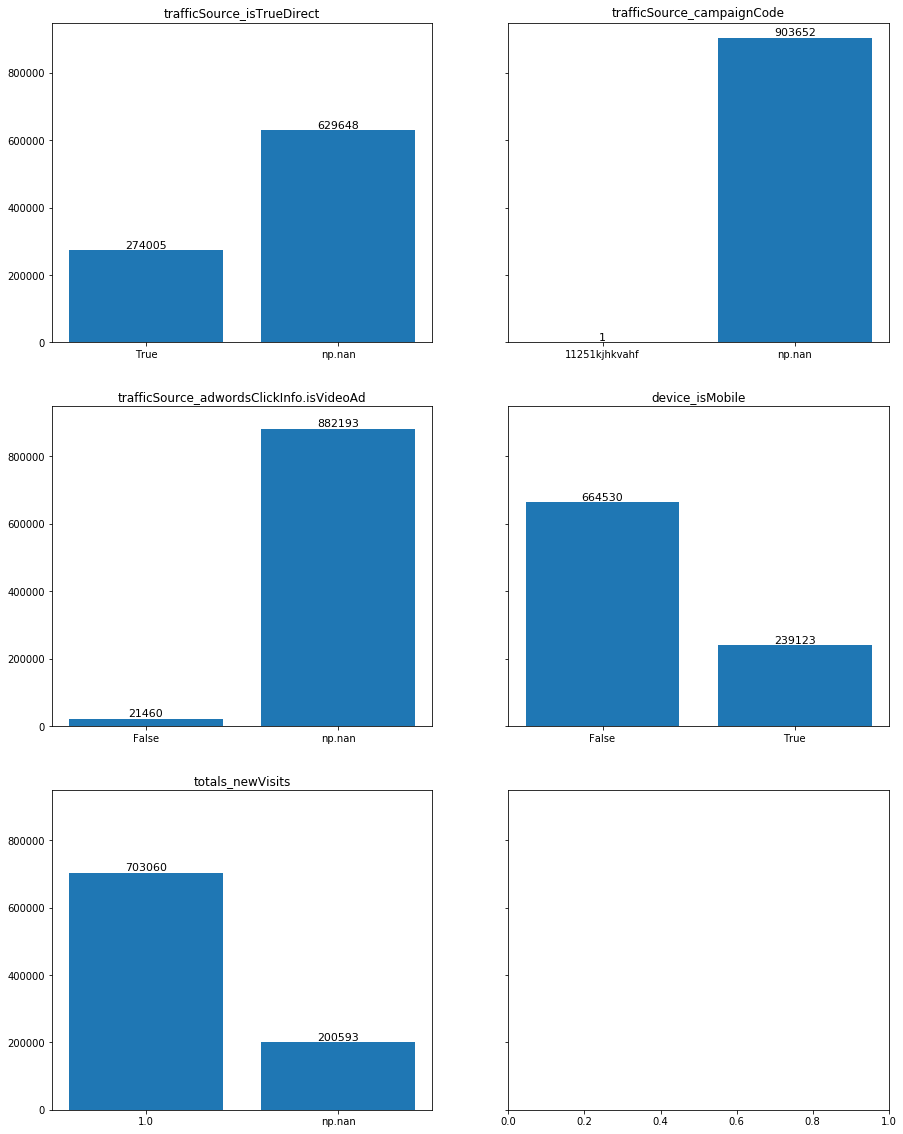

In [16]:
# Plot ten features count
plot_list,top_idx = gen_plot_list(5)
sub_plot(plot_list,5)